# DAB直流母线电压上升——波形分析

In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

plt.style.use('seaborn-white')
# sns.set(style='white')

In [2]:
sps = pd.read_csv('./sps_data.csv', index_col=0, skiprows=lambda x: x % 1000 != 0)
dps = pd.read_csv('./dps_data.csv', index_col=0, skiprows=lambda x: x % 1000 != 0)

In [10]:
sps.columns

Index(['Vm1', 'Vm4', 'Vm5', 'Am3'], dtype='object')

In [11]:
sps.index

Float64Index([ 2.451555866903537e-06,  5.132251592900301e-06,
                7.96294801846369e-06,  1.114101940776848e-05,
              1.4820211699603406e-05,  2.507791522601261e-05,
              2.5365454972594056e-05,  2.552209401687289e-05,
               7.091927869701501e-05,  7.119040529376932e-05,
              ...
                 0.09952612450790617,     0.0995757382744673,
                 0.09962543476712589,    0.09967511076897491,
                 0.09971014125110654,     0.0997520332137296,
                 0.09980149674087872,    0.09985110399498781,
                 0.09990074341151048,    0.09995041485112761],
             dtype='float64', name='Time', length=2054)

In [7]:
dps[np.abs(dps[udc]-701.155) < 1]

,Vm1,Vm4,Vm5,Am3
Time,,,,
0.015100,700.277643,-841.059863,-700.940066,-6.771418
0.015199,700.335295,111.668371,700.320012,0.369532
0.015224,700.472252,-17.032664,-374.660098,6.483118
0.015250,700.556908,-346.657378,-598.578371,-3.982708
0.015275,701.195643,857.921814,701.850335,3.648472
...,...,...,...,...
0.099876,701.155660,687.452013,692.273091,-0.020545
0.099901,701.155751,-721.209107,-694.816440,-0.042908
0.099927,701.155781,693.321981,702.850300,0.067030


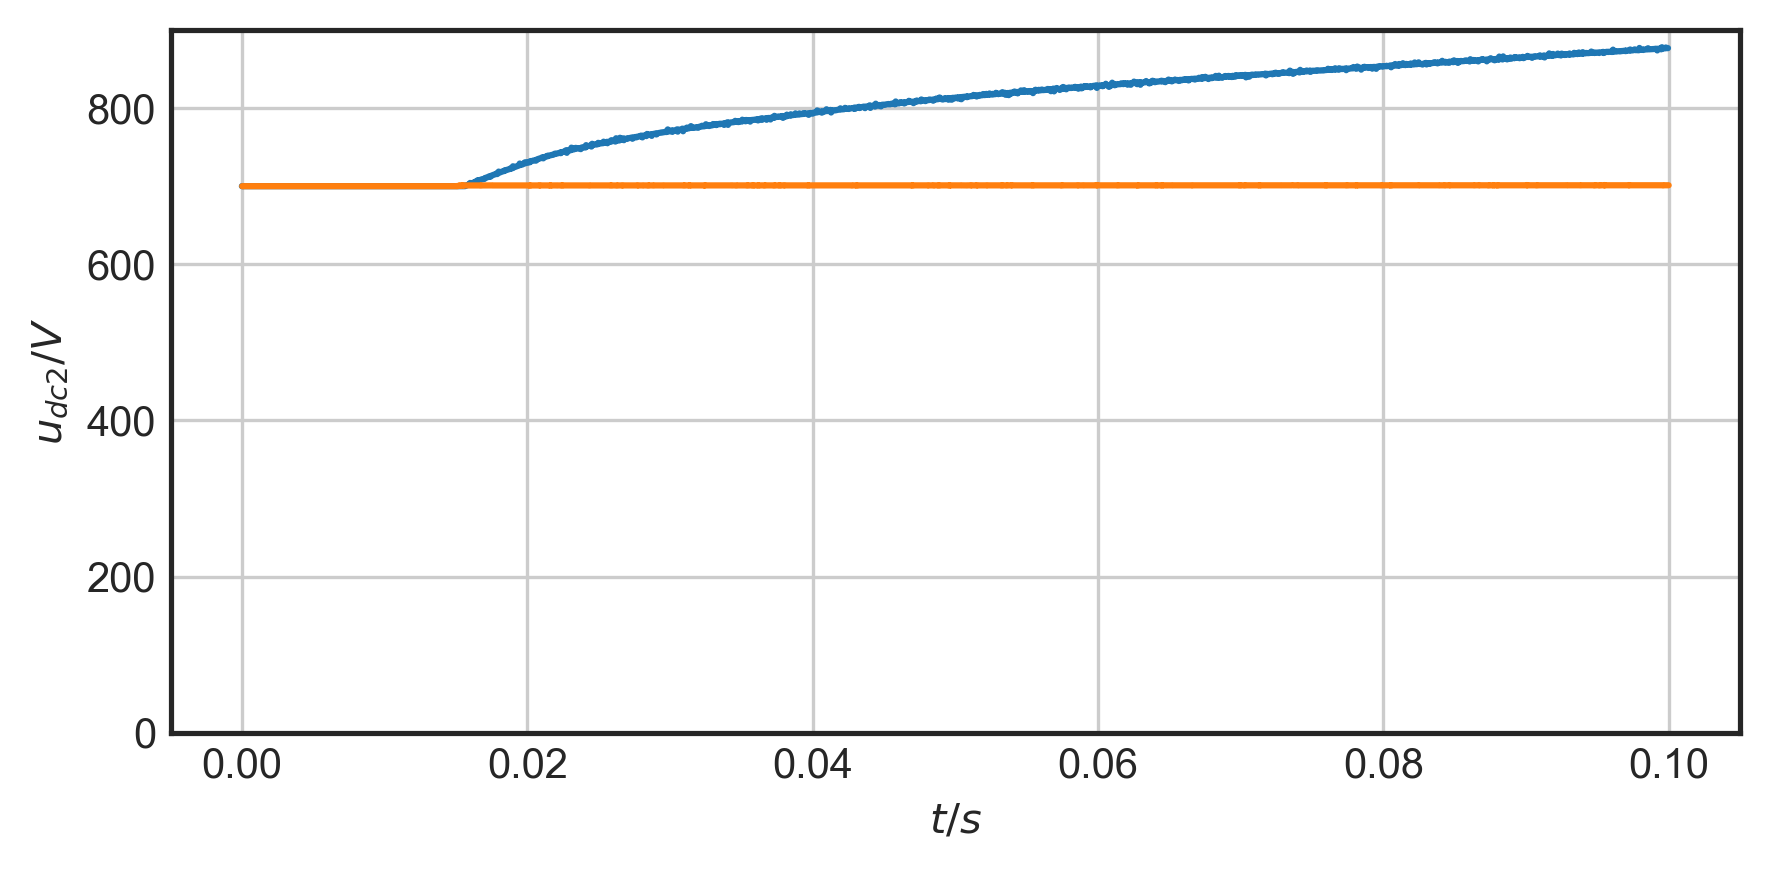

In [39]:
udc = 'Vm1'

plt.figure(dpi=300, figsize=(6,3))


x1, y1 = sps.index, sps[udc].apply(lambda x: 700 if x < 700 else x)
x2, y2 = dps.index, dps[udc].apply(lambda x: 700 if x < 700 else x)


plt.plot(x1, y1, label='Original')
plt.plot(x2, y2, label='After adding stage X')

plt.ylabel('$u_{dc2}/V$')
plt.ylim(0, 900)
plt.xlabel('$t/s$')

# plt.legend()
# sns.despine()
plt.grid(True)
plt.tight_layout()
    

In [30]:
origin = pd.DataFrame({'Vm1': 0}, index=[0.015100]); origin

,Vm1
0.0151,0


In [33]:
x1.to_list()

[0.015100680932307884,
 0.015150464432655388,
 0.0152002895652099,
 0.015250078062421998,
 0.015278477443813727,
 0.015327188574419856,
 0.01537677550472429,
 0.015426448959802809,
 0.01547613967694957,
 0.015525869601048887,
 0.015575662653818937,
 0.01562545245897481,
 0.015675236471099627,
 0.015725034319264492,
 0.01575243851415983,
 0.01580197835157533,
 0.01585161378637237,
 0.0159012987458524,
 0.01595101278522359,
 0.016000782885959932,
 0.016050583801345112,
 0.016100383318174094,
 0.01615018965537456,
 0.016200027936964036,
 0.016227479202215976,
 0.01627706358478776,
 0.0163267158683619,
 0.016376388265970983,
 0.016426140288240097,
 0.016475881976150752,
 0.016525696748206066,
 0.016575491338454415,
 0.01662528332203072,
 0.016675113425227938,
 0.01672338477003809,
 0.016752282850519763,
 0.01680189459683943,
 0.016851569302481714,
 0.016901283388021972,
 0.016951047885259782,
 0.017000791277339253,
 0.017050595947643687,
 0.017100398290260603,
 0.01715020961709463,
 0.0172

In [62]:
_dps = pd.read_csv('./dps_data.csv', index_col=0, header=0, skiprows=lambda x: 0 < x < 3700000)

In [24]:
_dps.shape

(11267, 4)

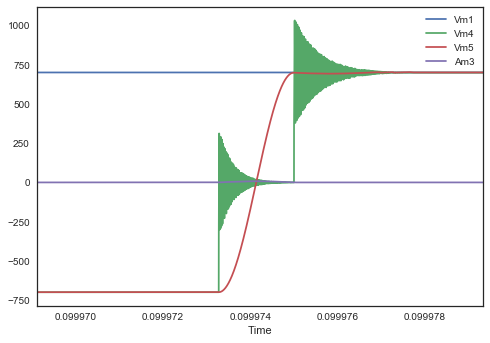

In [121]:
_dps[(_dps.index > 0.1-31e-6) & (_dps.index < 0.1-20e-6)].plot()

Text(0.5, 0, '\n$t/s$')

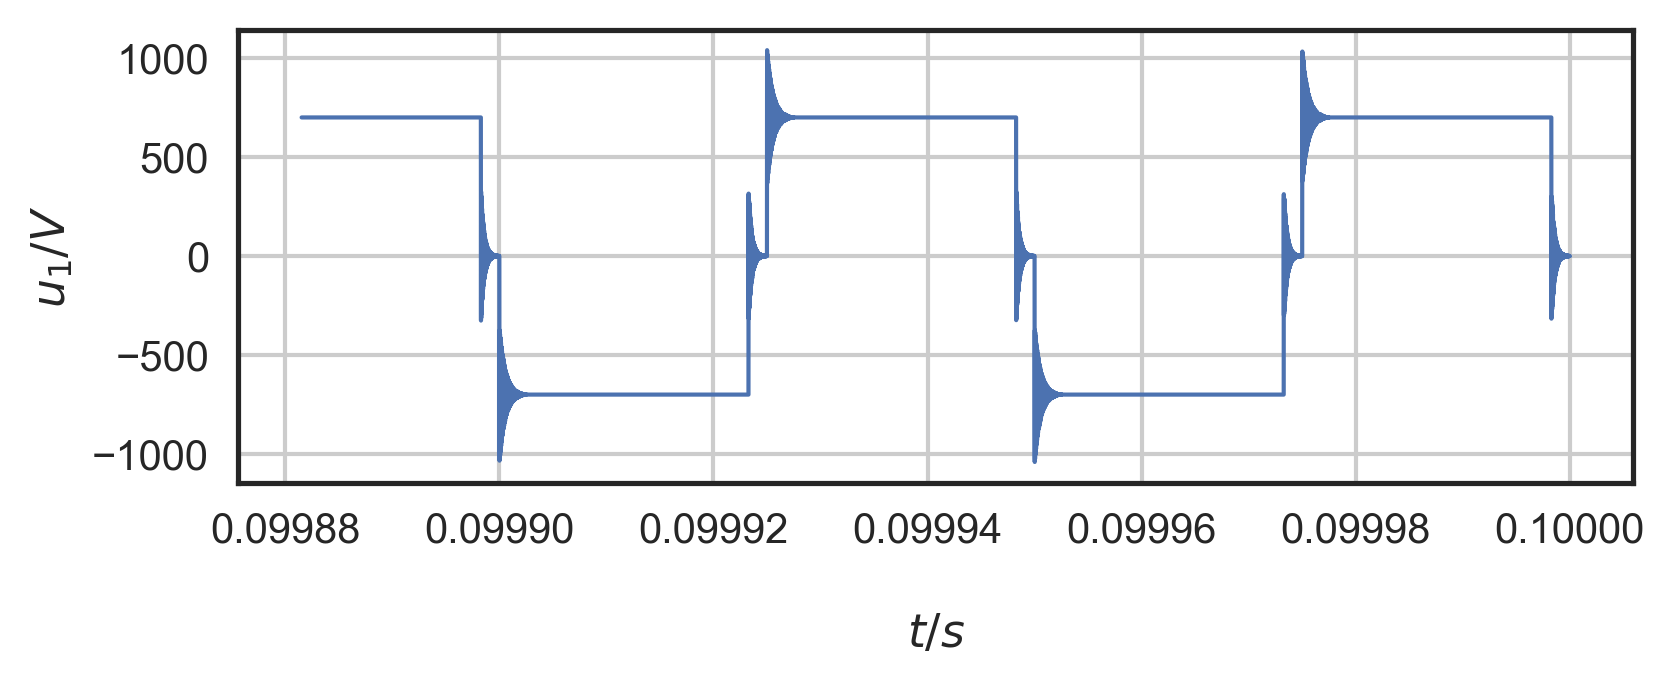

In [65]:
dps = _dps.iloc[-4000:]
fig = plt.figure(dpi=300, figsize=(6,2))
plt.plot(dps.index, dps[u], label='$u_{ab}/V$', linewidth=1)
plt.grid(True)
plt.ylabel('$u_{1}/V$')#, xticks=[])
plt.xlabel(f'\n$t/s$')

<Figure size 1800x1200 with 0 Axes>

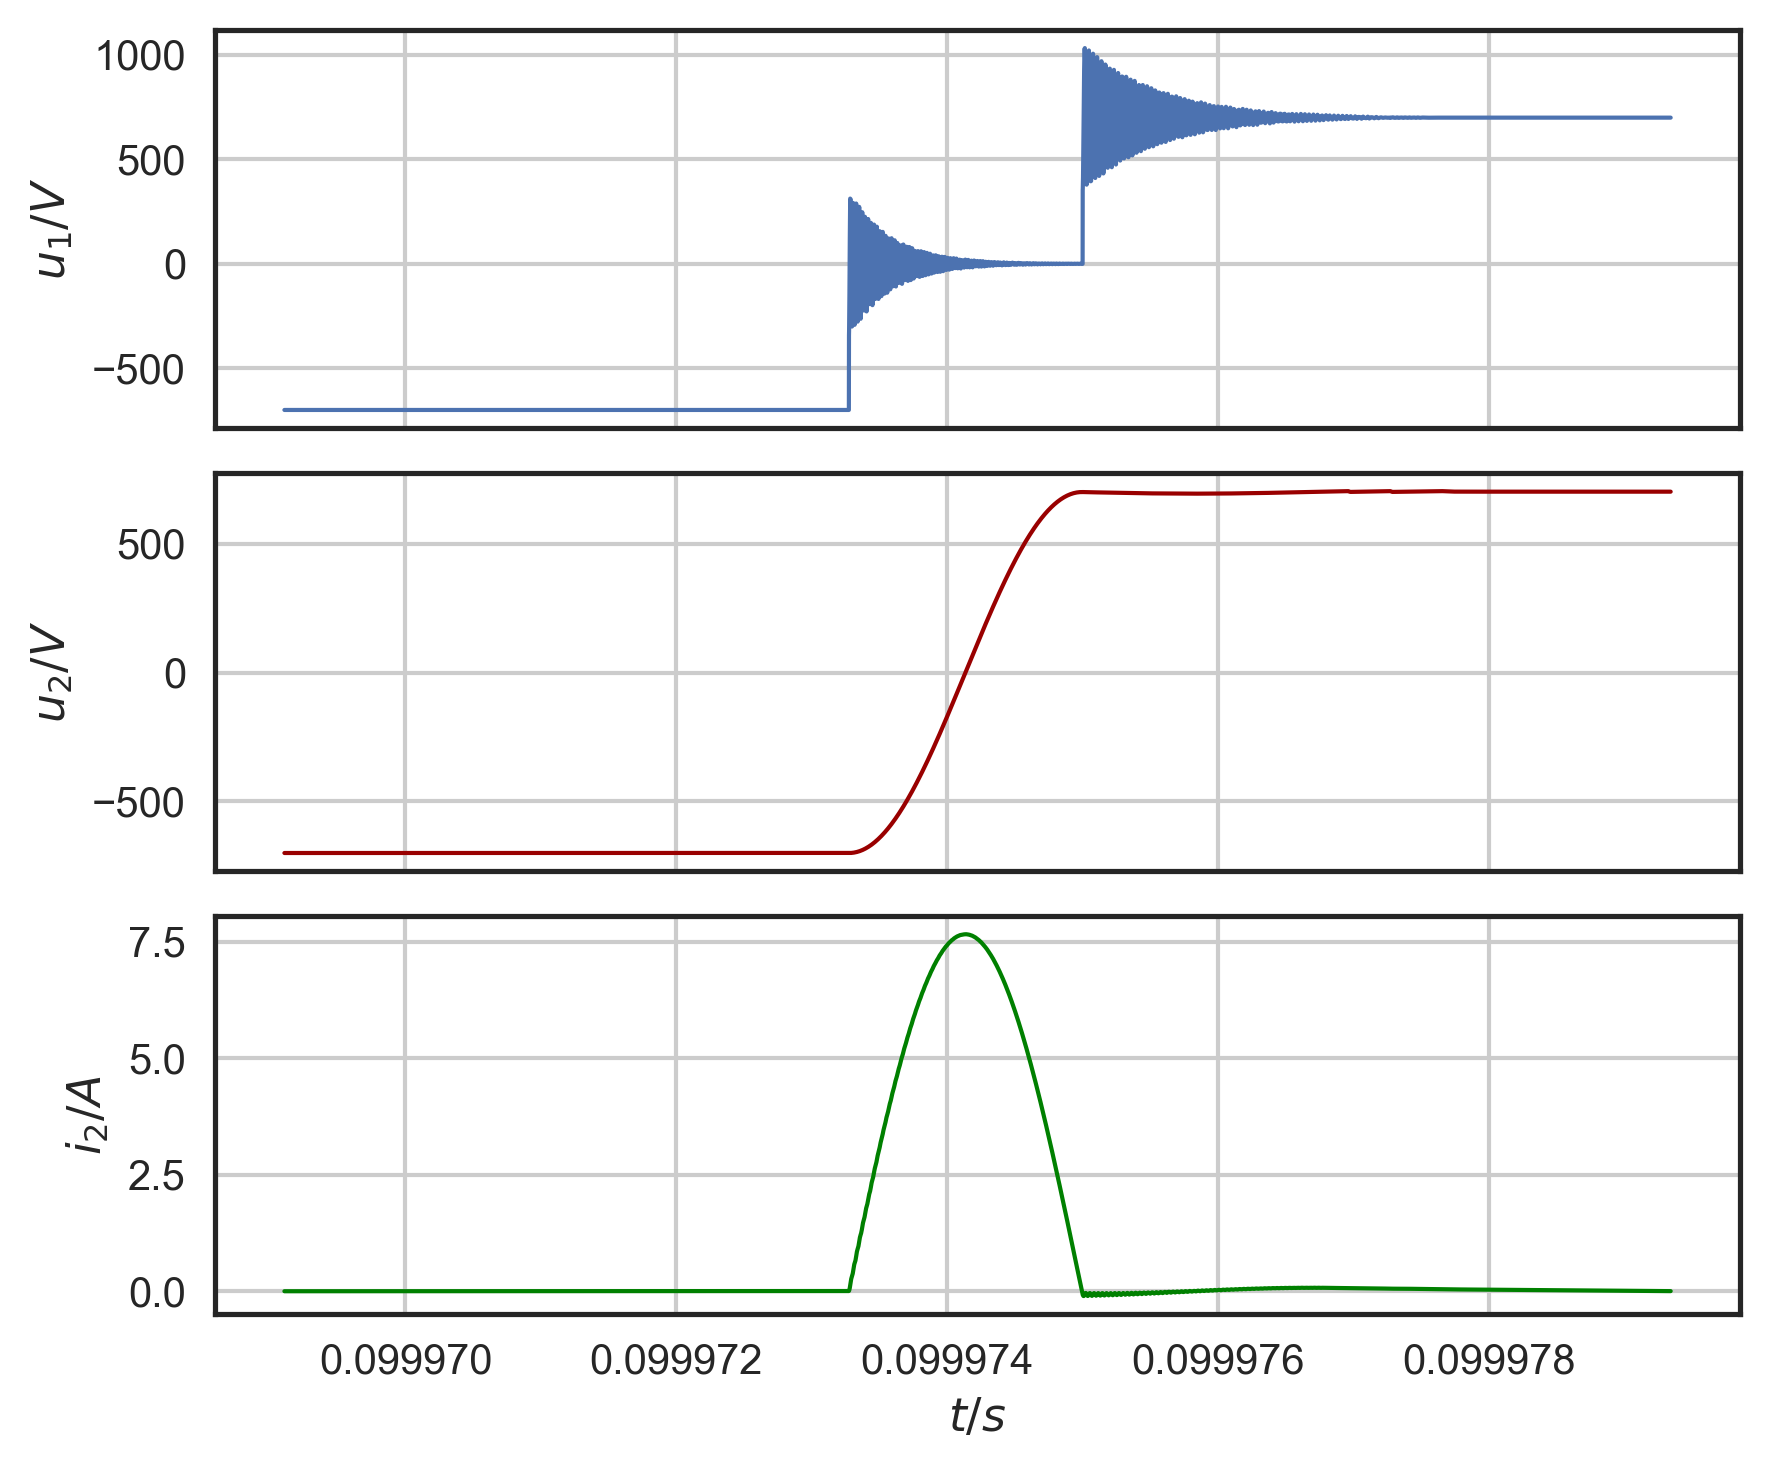

In [130]:
dps = _dps[(_dps.index > 0.1-31e-6) & (_dps.index < 0.1-20e-6)]

fig = plt.figure(dpi=300, figsize=(6,4))
# axes[0].set(title=title+'\n')

x = dps.index
u, v, i = 'Vm4', 'Vm5', 'Am3'

fig, (u1, u2, i2) = plt.subplots(3,1, sharex=True, figsize=(6,5), dpi=300)
plt.xlabel('$t/s$')

u1.plot(x, dps[u], label='$u_{1}/V$', linewidth=1)
u1.set(ylabel='$u_{1}/V$')
u1.grid(True)

u2.plot(x, dps[v], '#990000',label='$u_{2}/V$', linewidth=1)
u2.set(ylabel='$u_{2}/V$')
u2.grid(True)

i2.plot(x, dps[i], 'g', label='$i_{2}/A$', linewidth=1)
i2.set(ylabel='$i_{2}/A$')
i2.grid(True)

plt.tight_layout()

In [80]:
plt.subplots?

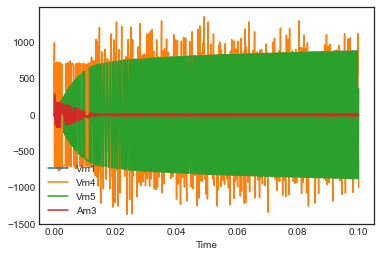

In [4]:
sps.plot()

In [5]:
sps.shape

(2054, 4)

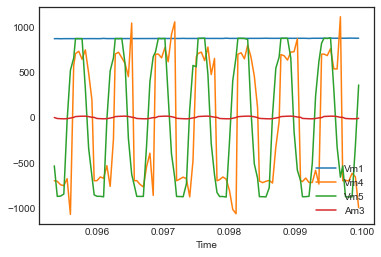

In [6]:
sps.iloc[-100:,:].plot()